# ELPI

El siguiente script tiene como objetivo utilizar los datos de la Encuesta Longitudinal sobre Primera Infancia para predecir notas a partir de un conjunto de evaluaciones y preguntas realizadas a niños y sus cuidadores principales. Para ello, se explorarán los datos y luego se probarán diferentes modelos de Machine Learning para ver si es posible predecir con una alta tasa de acierto las notas de los niños a partir de las otras variables presentes en las bases de datos disponibles.

Cada niño está identificado por un número de folio único, y la variable target que corresponde a las notas de los niños al año 2017 se llama `c3_a` y tiene la siguiente estructura:

¿Qué rango de notas tienes?
1. Entre 6.0 y 7.0
2. Entre 5.0 y 5.9
3. Entre 4.0 y 4.9
4. Menos de 4.0

### **Importar Paquetes y Datos**

In [1]:
# Manipulación de los datos
import pandas as pd
import numpy as np

# Visualización 
import matplotlib.pyplot as plt
import seaborn as sns

# Definimos algunos parámetros para el formato de los gráficos
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

La base de datos "train" contiene el subset de entrenamiento. Por su parte, la base datos "test" es el subset de testeo. Los subset se crearon ajustando por el desbalance en la distribución de respuestas de la variable target que en este caso son las notas.

In [2]:
pd.options.display.max_columns = 150

# Importar los datos
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,X,folio,sexo,edad,p2_curso,a1,a3,a4,a5,a6,a8,a11,a12,a13,a14,a15,a16,a17,a18,a19,a20,a21_1,a21_2,a21_3,a21_4,a21_5,a21_6,a21_7,a21_8,a22,a23,b1,b2_1,b2_2,b2_3,b2_4,b2_5,b2_6,b2_7,b2_8,b2_9,b3,b8_1,b8_2,b8_3,b13_1,b13_2,b13_3,b17,b18,b19,b20,b21,b22,b23,b24,c3_a,c4,c5,d1,d2,d3,d4_1,d4_2,d4_3,d4_4,tae_p1,tae_p2,tae_p3,tae_p4,tae_p5,tae_p6,tae_p7,tae_p8,tae_p9,...,mo_8_2017,cesd_p1a_2017,cesd_p1b_2017,cesd_p1c_2017,cesd_p1d_2017,cesd_p1e_2017,cesd_p1f_2017,cesd_p1g_2017,cesd_p1h_2017,cesd_p1i_2017,cesd_p1j_2017,cesd_p2_2017,psi_p1_2017,psi_p2_2017,psi_p3_2017,psi_p4_2017,psi_p5_2017,psi_p6_2017,psi_p7_2017,psi_p8_2017,psi_p9_2017,psi_p10_2017,psi_p11_2017,psi_p12_2017,psi_p13_2017,psi_p14_2017,psi_p15_2017,psi_p16_2017,psi_p17_2017,psi_p18_2017,psi_p19_2017,psi_p20_2017,psi_p21_2017,psi_p22a_2017,psi_p23_2017,psi_p24_2017,psi_p25_2017,psi_p26_2017,psi_p27_2017,psi_p28_2017,psi_p29_2017,psi_p30_2017,psi_p31_2017,psi_p32_2017,psi_p33_2017,psi_p34_2017,psi_p35_2017,psi_p36_2017,pscs_p1_2017,pscs_p2_2017,pscs_p3_2017,pscs_p4_2017,pscs_p5_2017,pscs_p6_2017,pscs_p7_2017,pscs_p8_2017,pscs_p9_2017,pscs_p10_2017,pscs_p11_2017,pscs_p12_2017,pscs_p13_2017,pscs_p14_2017,pscs_p15_2017,pscs_p16_2017,pscs_p17_2017,home_p1_2017,home_p2_2017,home_p3_2017,home_p6_2017,home_p8_2017,home_p12_2017,cesd10_pb_2017,cesd10_int_2017,pscs_pb_2017,psi_pb_total_2017
0,1,100011,2,11,6.0,2,2,2,2,1,1,4,1,3,3,1,3,1,2,2,2,1,2,1,2,2,2,1,2,1,1,1,1,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,1,2,1,2,2,2,3,2,2,3,2,2,2,2,1,1,2,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,3.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,77.0,36.0
1,2,100091,1,12,6.0,1,2,1,2,2,3,1,1,2,1,3,3,2,3,3,2,2,1,1,1,2,1,1,2,5,2,1,1,1,2,1,2,2,2,2,2,1,1,2,2,1,2,2,2,1,1,1,1,1,1,1,2,1,1,3,3,1,1,1,1,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,4.0,4.0,4.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,4.0,5.0,4.0,2.0,4.0,4.0,4.0,4.0,2.0,4.0,1.0,4.0,2.0,4.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,1.0,4.0,2.0,4.0,4.0,2.0,2.0,4.0,2.0,4.0,4.0,4.0,2.0,4.0,2.0,4.0,2.0,4.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,15.0,1.0,56.0,81.0
2,4,100131,1,11,7.0,1,2,2,2,2,1,2,1,3,2,3,2,1,2,2,2,2,2,1,2,1,1,1,2,3,4,2,1,2,1,2,2,2,2,2,2,2,1,2,2,2,2,2,1,1,1,2,2,2,2,3,1,1,3,2,2,2,2,1,1,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,2.0,1.0,0.0,0.0,2.0,2.0,0.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,4.0,3.0,5.0,4.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,3.0,3.0,5.0,5.0,5.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,0.0,75.0,33.0
3,5,100151,2,12,6.0,2,2,2,2,1,1,2,2,3,2,3,2,1,1,2,3,1,1,1,1,2,1,1,2,2,2,1,1,2,2,2,2,2,1,2,2,2,1,1,2,2,2,2,2,1,1,1,1,2,1,1,2,1,2,3,2,3,1,1,2,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,3.0,1.0,1.0,0.0,1.0,2.0,0.0,1.0,2.0,3.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,5.0,3.0,5.0,2.0,5.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,73.0,40.0
4,6,100161,1,11,6.0,1,2,1,1,2,3,2,1,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,1,2,2,2,2,2,1,2,2,2,2,2,2,2,1,2,2,2,2,2,1,1,1,2,1,1,1,2,1,2,2,2,2,1,1,1,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,4.0,NaN,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,77.0,43.0


## Análisis Exploratorio

A continuación observaremos nuestros datos, qué tipo de variables tenemos y cómo se distribuyen. También analizaremos los datos perdidos y definiremos los tipos de variables con los que contamos antes de pasar a probar los modelos de Machine Learning.




### *Columnas Integer*

Aquí podemos ver la cantidad de opciones de respuesta que contiene cada variable de tipo `integer`. Observamos en el gráfico que la mayoría de las variables son "Booleans", es decir, con dos opciones de respuesta, una que indica presencia de "x" y otra que indica ausencia de "x".

##### REVISAR POR QUÉ HAY UNA PREGUNTA CON 5MIL Y TANTAS OPCIONES DE RESPUESTA

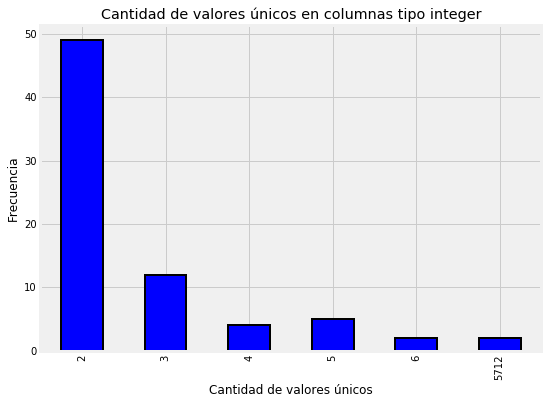

In [3]:
train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(color = 'blue', 
                                                                             figsize = (8, 6),
                                                                            edgecolor = 'k', linewidth = 2);
plt.xlabel('Cantidad de valores únicos'); plt.ylabel('Frecuencia');
plt.title('Cantidad de valores únicos en columnas tipo integer');

### *Columnas Float*

Ahora observaremos las variables de tipo `float`, que refiere a variables que son continuas. La mejor forma para hacer esto es graficar la distribución de estas variables, agrupando por cada valor de la variable `c3_a` que corresponde a nuestra variable objetivo.

#### Agregar qué significa cada variable

/home/caracena/Documents/Projects/venv3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


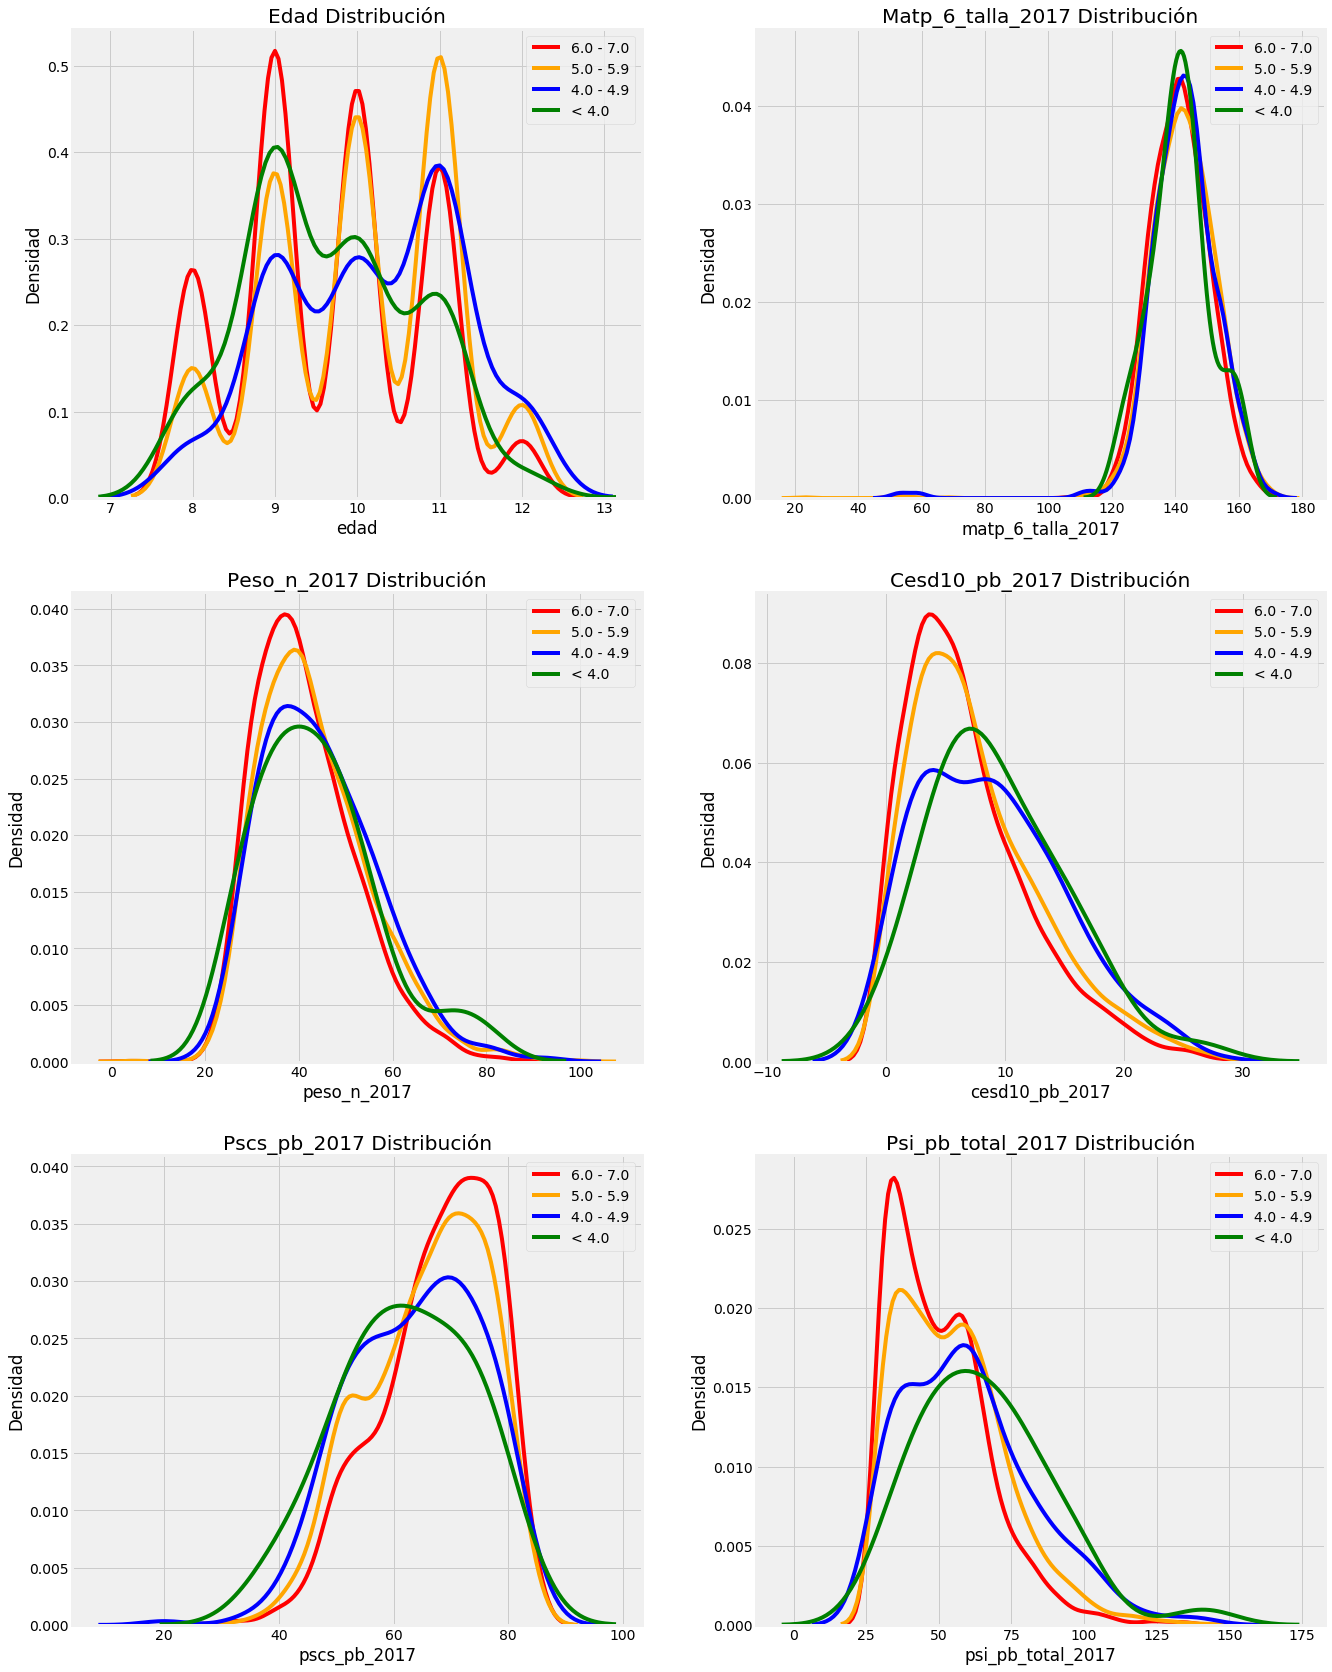

In [4]:

from collections import OrderedDict

plt.figure(figsize = (20, 16))
plt.style.use('fivethirtyeight')

# Color mapping
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
score_mapping = OrderedDict({1: '6.0 - 7.0', 2: '5.0 - 5.9', 3: '4.0 - 4.9', 4: '< 4.0'})

cols = ['edad','matp_6_talla_2017', 'peso_n_2017', 'cesd10_pb_2017', 'pscs_pb_2017', 'psi_pb_total_2017']
train_num = train[cols]
# Iterate through the float columns
for i, col in enumerate(train_num):
    ax = plt.subplot(4, 2, i + 1)
    # Iterate through the poverty levels
    for school_score, color in colors.items():
        # Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['c3_a'] == school_score, col].dropna(), 
                    ax = ax, color = color, label = score_mapping[school_score])
        
        plt.title(f'{col.capitalize()} Distribución'); plt.xlabel(f'{col}'); plt.ylabel('Densidad')

plt.subplots_adjust(top = 2)

### *Columnas Objeto*

Confirmamos que solo hay variables representadas por números

In [5]:
train.select_dtypes('object').head()

""
0
1
2
3
4


Para seguir explorando los datos uniremos los data set de entrenamiento y de testeo.

In [6]:
# Agregamos valores nulos a la variable que vamos a testear
test['c3_a'] = np.nan
data = train.append(test, ignore_index = True)

## **Exploramos las etiquietas de la variable objetivo**

Hay 4 categorías posibles en nuestra variable objetivo, la primera categoría indica notas de 6.0 a 7.0, la segunda de 5.0 a 6,0, la tercera de 4.0 a 5.0 y la cuarta indica notas menores a 4.0. En le gráfico se observa que la distribución de respuestas a lo largo de las cateogrías no es pareja, están "desbalanceadas". Esto puede traer problemas más adelante para el entrenamiento, puesto que es más difícil que el algoritmo aprenda a clasificar casos para los cuales tiene pocos ejemplos para aprender a clasificar. Pero, nos hicimos cargo de eso antes de importar los datos.

1.0    3144
2.0    2227
3.0     304
4.0      37
Name: c3_a, dtype: int64

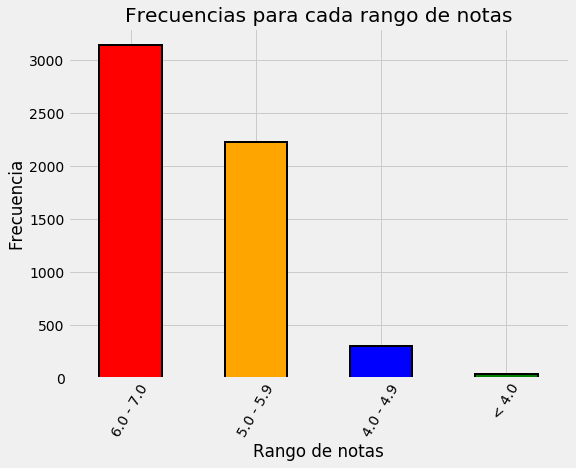

In [7]:
train_labels = data.loc[(data['c3_a'].notnull()), ['c3_a']]

# Frecuencia en la que la muestra tiene cada valor posible de la variable target
label_counts = train_labels['c3_a'].value_counts().sort_index()

# Gráfico de barra con la ocurrencia de cada valor posible de la variable target
label_counts.plot.bar(figsize = (8, 6), 
                      color = colors.values(),
                      edgecolor = 'k', linewidth = 2)

# Formatear gráfico
plt.xlabel('Rango de notas'); plt.ylabel('Frecuencia'); 
plt.xticks([x - 1 for x in score_mapping.keys()], 
           list(score_mapping.values()), rotation = 60)
plt.title('Frecuencias para cada rango de notas');

label_counts

# **Missing Data**

Miraremos las variable que tienen mayor porcentaje de datos perdidos. Así podremos ir a ver cada una y ver si hay datos que se pueden rescatar, o si las variables que hay que eliminar altera mucho la distribución de la variable obketico.

In [8]:
# Número de perdidos por columna
missing = pd.DataFrame(data.isnull().sum()).rename(columns = {0: 'Total'})

# Crear porcentaje de perdidos
missing['Porcentaje'] = missing['Total'] / len(data)

missing.sort_values('Porcentaje', ascending = False).head(10).drop('c3_a')

,Total,Porcentaje
psi_p22a_2017,212,0.029696
peso_n_2017,65,0.009105
matp_6_talla_2017,53,0.007424
home_p12_2017,26,0.003642
home_p8_2017,26,0.003642
home_p6_2017,26,0.003642
home_p3_2017,26,0.003642
home_p2_2017,26,0.003642
home_p1_2017,24,0.003362


Previo a importar los datos a este script, se eliminaron todas aquellas variables que tenían más de un 20% de datos pedidos por lo que no tendremos que lidiar con ese problema. Sin embargo, y solo para ejemplificar plotearemos la variable "psi_p22a_2017", para mostrar cómo se exploran los datos perdidos. Lo importante es observar estos datos para entender por qué se dio la pérdida de datos y si estos son recuperables o no.

In [9]:
def plot_value_counts(df, col, heads_only = False):
    plt.figure(figsize = (8, 6))
    df[col].value_counts().sort_index().plot.bar(color = 'blue',
                                                 edgecolor = 'k',
                                                 linewidth = 2)
    #plt.xlabel(f'{col}'); plt.title(f'{col} Value Counts'); plt.ylabel('Count')
    plt.xlabel({col}); plt.title('Frecuencia de valores de la variable'); plt.ylabel('Frecuencia')
    plt.show();

Esta variable entrega información sobre qué tan buenos padres creen que son lo padres de los niños entrevistados. El gráfico muestrala distribución de las respuestas, las cuales van de 1 = "Creo que soy un(a) muy buen(a) padre(madre)" a 5 = "Creo que soy un(a) muy mal(a) padre(madre)"

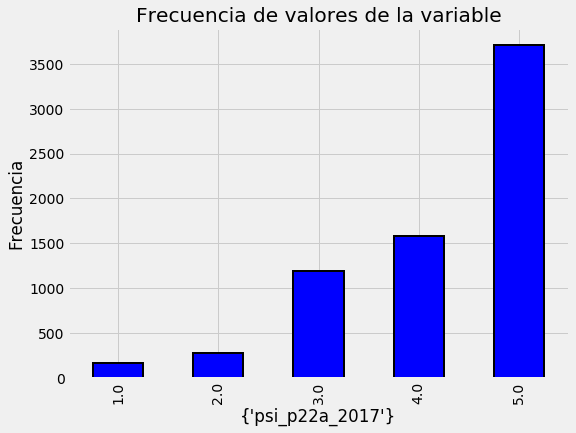

In [10]:
plot_value_counts(data, 'psi_p22a_2017')

Ahora miraremos solo aquellos datos perdidos, y veremos cómo cambia la distribución de nuestra variable de interés cuando quitamos los datos perdidos vs cuando los dejamos. Se ve que la distribución no varía mucho, entonces la variable target no se ve en riesgo si quitamos los perdidos en cuestión. Sin embargo, como en este caso son pocos, privilegiaremos tener mayor n y los dejaremos.

In [11]:
data['psi_p22a_2017-missing'] = data['psi_p22a_2017'].isnull()

In [12]:
data['psi_p22a_2017-missing'].describe()

count      7139
unique        2
top       False
freq       6927
Name: psi_p22a_2017-missing, dtype: object

### a. Distribución de las notas dejando fuera los casos con datos perdidos

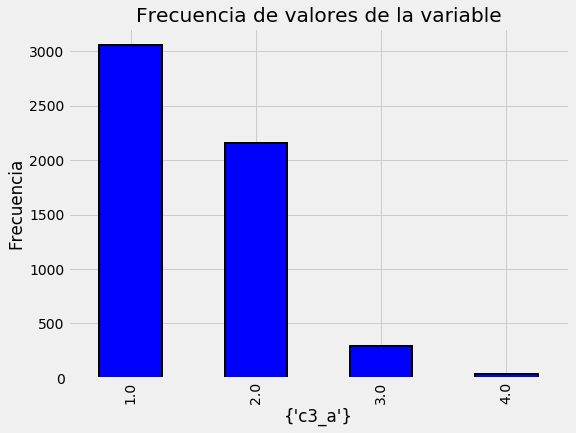

In [13]:
plot_value_counts(data[(data['psi_p22a_2017-missing'] == 0)], 
                  'c3_a')

### b. Distribución de las notas en los datos perdidos.

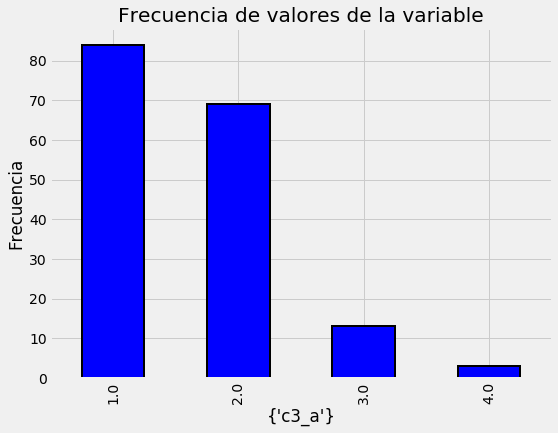

In [14]:
plot_value_counts(data[(data['psi_p22a_2017-missing'] == 1)], 
                  'c3_a')

# **Feature Engineering**

Hasta ahora hemos hecho un análisis exploratorio de los datos, y antes de empezar a probar modelos de Machine Learning es importante definir el tipo de variables que tenemos.

## **Definición de Tipos de Variables**

Hay distintos tipos de categorías de variables:

* Boolean: de tipo "Sí" o "No" (o mas bien "0" y "1")
* Ordinales: números que refieren a una jerarquía de respuestas.
* Continuas: números continuos que indican cantidad o el valor de algo
* Identificación: no es una categoría de variable propiamente tal pero debemos detallar qué variables son de identificación para no integrarlas en el proceso de Machine Learning.

In [15]:
id_ = ['folio', 'c3_a']

In [16]:
ind_bool = ['sexo', 'a1', 'a3', 'a4', 'a5', 'a6', 'a8', 'a12', 'a21_1', 'a21_2', 'a21_3', 'a21_4', 'a21_5', 
            'a21_6', 'a21_7', 'a21_8', 'p1_2017', 'p2_2017', 'p3_2017', 'p4_2017', 'p5_2017', 'p6_2017', 
            'p7_2017', 'p8_2017', 'p9_2017', 'p16_2017', 'mo_1a_2017', 'mo_2_2017',
            'cesd_p2_2017', 'home_p1_2017', 'home_p2_2017', 'home_p3_2017', 'home_p6_2017', 'home_p8_2017',
            'home_p12_2017', 'cesd10_int_2017', 'b2_1', 'b2_2', 'b2_3', 'b2_4', 'b2_5', 'b2_6', 'b2_7', 'b2_8',
            'b2_9', 'b8_1', 'b8_2', 'b8_3', 'b13_1', 'b13_2', 'b13_3', 'b17', 'b18', 'b19', 'b20', 'b21', 'b22',
            'd4_1', 'd4_2', 'd4_3', 'd4_4', 'tae_p1', 'tae_p2', 'tae_p3', 'tae_p4', 'tae_p5', 'tae_p6', 'tae_p7',
            'tae_p8', 'tae_p9', 'tae_p10', 'tae_p11', 'tae_p12', 'tae_p13', 'tae_p14', 'tae_p15', 'tae_p16', 
            'tae_p17', 'tae_p18', 'tae_p19', 'tae_p20', 'tae_p21', 'tae_p22', 'tae_p23']

ind_ordered = ['a11', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18', 'a19', 'a20', 'a22', 'a23', 'b1',
               'b23', 'b24', 'c4', 'c5', 'd1', 'd2', 'd3', 'eclis_p1', 'eclis_p2', 'eclis_p3', 'eclis_p4',
               'eclis_p5', 'eclis_p6', 'eclis_p7', 'eclis_p8', 'mo_3_2017', 'mo_4_2017', 'mo_5_2017',
               'mo_6_2017', 'mo_7_2017', 'mo_8_2017', 'cesd_p1a_2017', 'cesd_p1b_2017', 'cesd_p1c_2017', 
               'cesd_p1d_2017', 'cesd_p1e_2017', 'cesd_p1f_2017', 'cesd_p1g_2017', 'cesd_p1h_2017', 'cesd_p1i_2017',
               'cesd_p1j_2017', 'cesd_p2_2017']

ind_cont = ['edad','matp_6_talla_2017', 'peso_n_2017', 'cesd10_pb_2017', 'pscs_pb_2017', 'psi_pb_total_2017']

apod_odered = ['psi_p1_2017', 'psi_p2_2017', 'psi_p3_2017', 'psi_p4_2017', 'psi_p5_2017', 'psi_p6_2017', 
               'psi_p7_2017', 'psi_p8_2017', 'psi_p9_2017', 'psi_p10_2017', 'psi_p11_2017', 'psi_p12_2017',
               'psi_p13_2017', 'psi_p14_2017', 'psi_p15_2017', 'psi_p16_2017', 'psi_p17_2017', 'psi_p18_2017', 
               'psi_p19_2017', 'psi_p20_2017', 'psi_p21_2017', 'psi_p22a_2017', 'psi_p23_2017', 'psi_p24_2017',
               'psi_p25_2017', 'psi_p26_2017', 'psi_p27_2017', 'psi_p28_2017', 'psi_p29_2017', 'psi_p30_2017', 
               'psi_p31_2017', 'psi_p32_2017', 'psi_p33_2017', 'psi_p34_2017', 'psi_p35_2017', 'psi_p36_2017', 
               'pscs_p1_2017', 'pscs_p2_2017', 'pscs_p3_2017', 'pscs_p4_2017', 'pscs_p5_2017', 'pscs_p6_2017', 
               'pscs_p7_2017', 'pscs_p8_2017', 'pscs_p9_2017', 'pscs_p10_2017', 'pscs_p11_2017', 'pscs_p12_2017',
               'pscs_p13_2017', 'pscs_p14_2017', 'pscs_p15_2017', 'pscs_p16_2017', 'pscs_p17_2017']

In [17]:
x = data[ind_bool + ind_ordered + id_ + ind_cont + apod_odered]

from collections import Counter

print('No hay repetidos: ', np.all(np.array(list(Counter(x).values())) == 1))
print('Cubrimos todas las variables: ', len(x) == data.shape[1])

No hay repetidos:  False
Cubrimos todas las variables:  False


## Buscando variables redundantes


**Correlaciones**

Para chequear si hay variables redundantes y explorar más los datos.

In [18]:
# Crear matrix de correlaciones
corr_matrix = data.corr()

# Seleccionamos triángulo superior de las correlaciones
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Buscamos el índice de las columnas que presentan una correlación mayor a 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.8)]

to_drop

['folio', 'p2_curso', 'cesd10_int_2017']

Arriba vemos cada par de variables que tienen una correlación mayor a 0.8 (que som el curso del niño, y su nivel de depresión). Para encontrar el otro par de cada pareja podemos subsetear `corr_matrix`. 

### 'cesd10_int_2017'

In [19]:
corr_matrix.loc[corr_matrix['cesd10_int_2017'].abs() > 0.8, corr_matrix['cesd10_int_2017'].abs() > 0.8]

,cesd10_pb_2017,cesd10_int_2017
cesd10_pb_2017,1.000000,0.824207
cesd10_int_2017,0.824207,1.000000


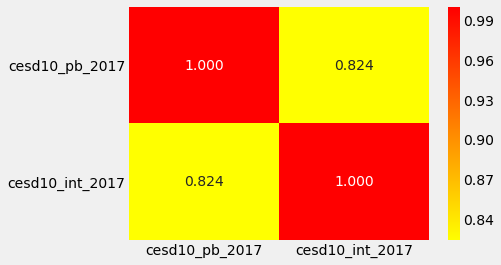

In [20]:
sns.heatmap(corr_matrix.loc[corr_matrix['cesd10_int_2017'].abs() > 0.8, corr_matrix['cesd10_int_2017'].abs() > 0.8],
            annot=True, cmap = plt.cm.autumn_r, fmt='.3f');

### p2_curso

In [21]:
corr_matrix.loc[corr_matrix['p2_curso'].abs() > 0.8, corr_matrix['p2_curso'].abs() > 0.8]

,edad,p2_curso
edad,1.000000,0.827152
p2_curso,0.827152,1.000000


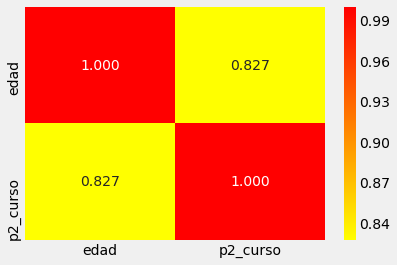

In [22]:
sns.heatmap(corr_matrix.loc[corr_matrix['p2_curso'].abs() > 0.8, corr_matrix['p2_curso'].abs() > 0.8],
            annot=True, cmap = plt.cm.autumn_r, fmt='.3f');

## Midiendo correlaciones con la variable objetivo


### Correlaciones de Pearson

Las variables que correlacionan más fuertemente con nuestra variable target son, con una relación negativa:
* psi_p18_2017: Mi hijo/a no parece aprender tan rápidamente como la mayoría de los niños/as
* tae_p21: Se me olvida lo que aprendo
* tae_p15: Cuando intento hacer algo, todo sale mal
* tae_p8: Generalmente, me meto en problemas
* psi_p21_2017: Mi hijo/a tarda mucho y se le hace difícil acostumbrarse a cosas nuevas

Con una relación positiva:
* tae_p22: Mis compañeros/as piensan que tengo buenas ideas
* c4: Qué tan importante para ti es que te vaya bien en el colegio
* tae_p3: Soy asututo/a, soy inteligente
* tae_p6: Soy bueno/a para hacer mis tareas

In [23]:
from scipy.stats import spearmanr

In [24]:
# Usamos solo dataset entrentamiento
train_heads = data.loc[data['c3_a'].notnull(), :].copy()

pcorrs = pd.DataFrame(train_heads.corr()['c3_a'].sort_values()).rename(columns = {'c3_a': 'pcorr'}).reset_index()
pcorrs = pcorrs.rename(columns = {'index': 'variable'})

print('Variables que correlacionan más negativamente:')
print(pcorrs.head())

print('\nVariables que correlacionan más positivamente:')
print(pcorrs.dropna().tail())

Variables que correlacionan más negativamente:
       variable     pcorr
0  psi_p18_2017 -0.277221
1       tae_p21 -0.234806
2       tae_p15 -0.187199
3        tae_p8 -0.158043
4  psi_p21_2017 -0.154458

Variables que correlacionan más positivamente:
    variable     pcorr
187  tae_p22  0.174203
188       c4  0.180096
189   tae_p3  0.257236
190   tae_p6  0.302214
191     c3_a  1.000000


### Correlaciones de Spearman

Las variables que correlacionan más fuertemente con nuestra variable target son, con una relación negativa:
* sexo: sexo del niño evaluado (1 = Hombre, 2 = Mujer)
* a20: ¿cuántos días dibujaste, pintaste, bailaste, tocaste algun, instrumento (frecuencia de realizar hobbies)
* b8_3: El cuidador se entera por otras personas sobre los amigos del niño
* p9_2017: No presenta dificultad física
* a21_1_2017: Usa redes sociales? (1 = sí, 2 = no)

Con una relación positiva:
* b24: Cómo es tu relación con tus compañeros y compañeras de curso
* c5: Cuánto te gusta ir al colegio
* edad: la edad del niño evaluado
* c4: Qué tan importante para ti es que te vaya bien en el colegio

In [25]:
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

feats = []
scorr = []
pvalues = []

# Iteramos por cada columna
for c in data:
    # Solo válido para números
    if data[c].dtype != 'object':
        feats.append(c)
        
        # Calculamos correlación Pearson
        scorr.append(spearmanr(train_heads[c], train_heads['c3_a']).correlation)
        pvalues.append(spearmanr(train_heads[c], train_heads['c3_a']).pvalue)
        
scorrs = pd.DataFrame({'variable': feats, 'scorr': scorr, 'pvalue': pvalues}).sort_values('scorr')

In [26]:
print('Variables que correlacionan más negativamente:')
print(scorrs.head())
print('\nVariables que correlacionan más positivamente:')
print(scorrs.dropna().tail())

Variables que correlacionan más negativamente:
    variable     scorr        pvalue
2       sexo -0.112631  1.369446e-17
20       a20 -0.090628  6.785205e-12
44      b8_3 -0.082822  3.635746e-10
105  p9_2017 -0.076072  8.590454e-09
21     a21_1 -0.070038  1.166620e-07

Variables que correlacionan más positivamente:
   variable     scorr        pvalue
55      b24  0.125798  1.382724e-21
58       c5  0.132471  8.821159e-24
3      edad  0.158533  1.819396e-33
57       c4  0.171741  4.625473e-39
56     c3_a  1.000000  0.000000e+00


Mirar las diferencias más importantes entre la correlación de Spearman y Pearson. 

In [27]:
corrs = pcorrs.merge(scorrs, on = 'variable')
corrs['diff'] = corrs['pcorr'] - corrs['scorr']

corrs.sort_values('diff').head()

,variable,pcorr,scorr,pvalue,diff
91,a23,-0.007400,0.005434,6.813535e-01,-0.012834
184,edad,0.147940,0.158533,1.819396e-33,-0.010593
79,b2_8,-0.025557,-0.015083,2.543877e-01,-0.010474
101,a15,0.008662,0.017988,1.740412e-01,-0.009327
142,b23,0.069134,0.078302,3.109156e-09,-0.009169


In [28]:
corrs.sort_values('diff').dropna().tail()

,variable,pcorr,scorr,pvalue,diff
100,b13_2,0.008262,-0.002859,0.828954,0.011121
78,b8_2,-0.028564,-0.039819,0.002613,0.011255
147,a11,0.070688,0.058546,0.000010,0.012142
109,p6_2017,0.019026,0.006106,0.644510,0.012919
116,p8_2017,0.029818,0.015567,0.239470,0.014251


## Machine Learning

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Armamos scorer para registrar las validaciones cruzadas
scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro')

In [30]:
# Etiquetas para el entrenamiento
train_labels = np.array(list(data[data['c3_a'].notnull()]['c3_a'].astype(np.uint8)))

# Tomamos los datos de entrenamiento
train_set = data[data['c3_a'].notnull()].drop(columns = ['folio', 'X', 'c3_a'])
test_set = data[data['c3_a'].isnull()].drop(columns = ['folio', 'X', 'c3_a'])

submission_base = test[['folio']].copy()

In [31]:
features = list(train_set.columns)

pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'median')), 
                      ('scaler', MinMaxScaler())])

# Ajustamos y transformamos data de entrenamiento
train_set = pipeline.fit_transform(train_set)
test_set = pipeline.transform(test_set)

In [32]:
model = RandomForestClassifier(n_estimators=100, random_state=10, 
                               n_jobs = -1)
# Validación curzada (10)
cv_score = cross_val_score(model, train_set, train_labels, cv = 10, scoring = scorer)

print(f'10 Validación Cruzada, puntaje F1 = {round(cv_score.mean(), 4)} con desv.est = {round(cv_score.std(), 4)}')

10 Validación Cruzada, puntaje F1 = 0.305 con desv.est = 0.0081


### Feature Importances

In [33]:
model.fit(train_set, train_labels)

# Importancia de las variables a dataframe
feature_importances = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
feature_importances.head()

,feature,importance
0,sexo,0.005403
1,edad,0.013312
2,p2_curso,0.013009
3,a1,0.003723
4,a3,0.002237


In [34]:
def plot_feature_importances(df, n = 10, threshold = None):
    """Plots n most important features. Also plots the cumulative importance if
    threshold is specified and prints the number of features needed to reach threshold cumulative importance.
    Intended for use with any tree-based feature importances. 
    
    Args:
        df (dataframe): Dataframe of feature importances. Columns must be "feature" and "importance".
    
        n (int): Number of most important features to plot. Default is 15.
    
        threshold (float): Threshold for cumulative importance plot. If not provided, no plot is made. Default is None.
        
    Returns:
        df (dataframe): Dataframe ordered by feature importances with a normalized column (sums to 1) 
                        and a cumulative importance column
    
    Note:
    
        * Normalization in this case means sums to 1. 
        * Cumulative importance is calculated by summing features from most to least important
        * A threshold of 0.9 will show the most important features needed to reach 90% of cumulative importance
    
    """
    plt.style.use('fivethirtyeight')
    
    # Ordenamos de mayor a menos importancia
    df = df.sort_values('importance', ascending = False).reset_index(drop = True)
    
    # Normalizamos la importancia de las variables para que sume 1, y calculamos importancia acumulada
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
    
    plt.rcParams['font.size'] = 12
    
    # Gráfico de barras de n variables de mayor importanca
    df.loc[:n, :].plot.barh(y = 'importance_normalized', 
                            x = 'feature', color = 'darkgreen', 
                            edgecolor = 'k', figsize = (12, 8),
                            legend = False, linewidth = 2)

    plt.xlabel('Importancia Normalizada', size = 18); plt.ylabel(''); 
    plt.title(f'{n} Variables más importantes', size = 18)
    plt.gca().invert_yaxis()
    
    
    if threshold:
        # Plot importancia acumulada
        plt.figure(figsize = (8, 6))
        plt.plot(list(range(len(df))), df['cumulative_importance'], 'b-')
        plt.xlabel('Cantidad de variables', size = 16); plt.ylabel('Importancia acumulada', size = 16); 
        plt.title('Importancia Acumulada de Variables', size = 18);
        
        # Cantidad de variables necesarias para alcanzar el umbral de importancia acumulada
        # Índice (tiene que sumar 1)
        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
        
        # Sumamos linea vertical al gráfico
        plt.vlines(importance_index + 1, ymin = 0, ymax = 1.05, linestyles = '--', colors = 'red')
        plt.show();
        
        print('{} variables dan cuenta del {:.0f}% de importancia acumulada.'.format(importance_index + 1, 
                                                                                  100 * threshold))
    
    return df

Las variables más importantes de acuerdo al gráfico que viene a continuación son:
 1. Peso
 2. Mi hijo/a no parece aprender tan rápidamente como la mayoría de los niños/a
 3. Talla (altura en cm)
 4. Soy bueno(a) para hacer mis tareas
 5. Puntaje Escala de Angustia Parental
 6. Puntaje Escala Eficacia y Satisfacción Parental
 7. Puntaje Escala de depresión (aplicada al niño/a)
 8. Edad
 9. Curso
 10. Se me olvida lo que aprendo
 11. Soy astuto/a, soy inteligente
 

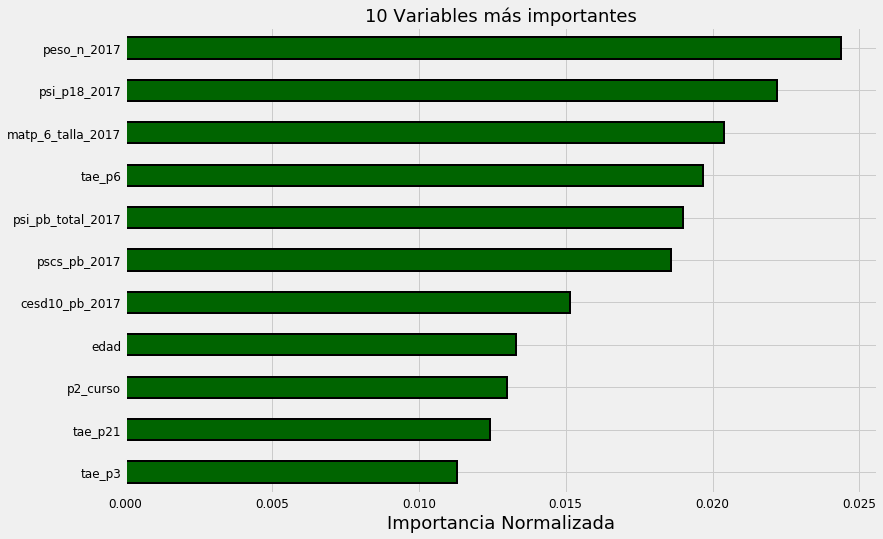

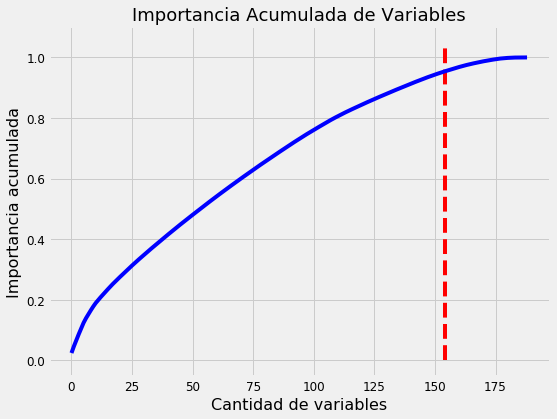

154 variables dan cuenta del 95% de importancia acumulada.


In [35]:
norm_fi = plot_feature_importances(feature_importances, threshold=0.95)

In [36]:
def kde_target(df, variable):
    """Plots the distribution of `variable` in `df` colored by the `Target` column"""
    
    colors = {1: 'red', 2: 'orange', 3: 'blue', 4: 'green'}

    plt.figure(figsize = (12, 8))
    
    df = df[df['c3_a'].notnull()]
    
    for level in df['c3_a'].unique():
        subset = df[df['c3_a'] == level].copy()
        sns.kdeplot(subset[variable].dropna(), 
                    label = f'Notas: {level}', 
                    color = colors[int(subset['c3_a'].unique())])

    plt.xlabel(variable); plt.ylabel('Densidad');
    plt.title('{} Distribución'.format(variable.capitalize()));

/home/caracena/Documents/Projects/venv3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


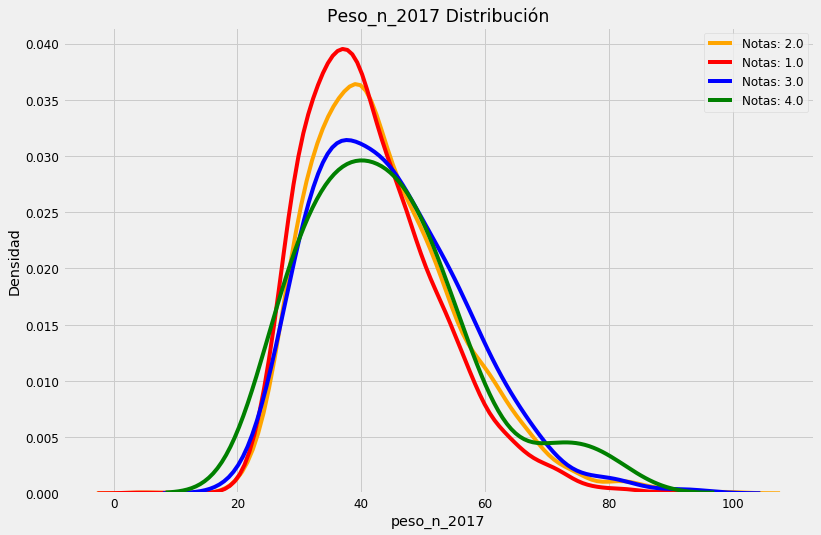

In [37]:
kde_target(data, 'peso_n_2017')

## Selección del modelo

In [38]:
# Importamos los modelos
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [39]:
import warnings 
from sklearn.exceptions import ConvergenceWarning

# Filtramos los warnings de los modelos
warnings.filterwarnings('ignore', category = ConvergenceWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = UserWarning)

# armamos un dataframe que guarde los resultados
model_results = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

def cv_model(train, train_labels, model, name, model_results=None):
    """Perform 10 fold cross validation of a model"""
    
    cv_scores = cross_val_score(model, train, train_labels, cv = 10, scoring=scorer, n_jobs = -1)
    print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')
    
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name, 
                                                           'cv_mean': cv_scores.mean(), 
                                                            'cv_std': cv_scores.std()},
                                                           index = [0]),
                                             ignore_index = True)

        return model_results

In [40]:
model_results = cv_model(train_set, train_labels, LinearSVC(), 
                         'LSVC', model_results)

10 Fold CV Score: 0.32362 with std: 0.02683


In [41]:
model_results = cv_model(train_set, train_labels, 
                         GaussianNB(), 'GNB', model_results)

10 Fold CV Score: 0.16127 with std: 0.03243


In [42]:
model_results = cv_model(train_set, train_labels, 
                         MLPClassifier(hidden_layer_sizes=(32, 64, 128, 64, 32)),
                         'MLP', model_results)

10 Fold CV Score: 0.33013 with std: 0.0198


In [43]:
model_results = cv_model(train_set, train_labels, 
                          LinearDiscriminantAnalysis(), 
                          'LDA', model_results)

10 Fold CV Score: 0.36544 with std: 0.02359


In [44]:
model_results = cv_model(train_set, train_labels, 
                         RidgeClassifierCV(), 'RIDGE', model_results)

10 Fold CV Score: 0.31493 with std: 0.01161


In [45]:
for n in [5, 10, 20]:
    print(f'\nKNN with {n} neighbors\n')
    model_results = cv_model(train_set, train_labels, 
                             KNeighborsClassifier(n_neighbors = n),
                             f'knn-{n}', model_results)


KNN with 5 neighbors

10 Fold CV Score: 0.26078 with std: 0.01386

KNN with 10 neighbors

10 Fold CV Score: 0.24811 with std: 0.01726

KNN with 20 neighbors

10 Fold CV Score: 0.23184 with std: 0.01263


In [46]:
from sklearn.ensemble import ExtraTreesClassifier

model_results = cv_model(train_set, train_labels, 
                         ExtraTreesClassifier(n_estimators = 100, random_state = 10),
                         'EXT', model_results)

10 Fold CV Score: 0.30609 with std: 0.00687


## Comparando el rendimiento de los modelos evaluados

In [47]:
model_results = cv_model(train_set, train_labels,
                          RandomForestClassifier(100, random_state=10),
                              'RF', model_results)

10 Fold CV Score: 0.30499 with std: 0.00808


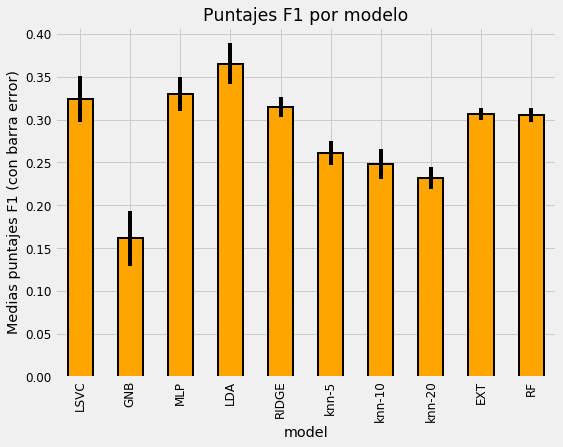

In [48]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                  edgecolor = 'k', linewidth = 2)
plt.title('Puntajes F1 por modelo');
plt.ylabel('Medias puntajes F1 (con barra error)');
model_results.reset_index(inplace = True)

## Selección de variables
Trataremos de quedarnos solo con aquellos elementos que más aportan al modelo.

In [49]:
train_set = pd.DataFrame(train_set, columns = features)

# Creamos matriz de correlaciones
corr_matrix = train_set.corr()

# Seleccionamos triángulo superior
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Encontramos los índices de las columnas con corr mayor a 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

[]

In [50]:
train_set = train_set.drop(columns = to_drop)
train_set.shape

(5712, 189)

In [51]:
test_set = pd.DataFrame(test_set, columns = features)
train_set, test_set = train_set.align(test_set, axis = 1, join = 'inner')
features = list(train_set.columns)

## Eliminación recursiva de variables con Random Forest

In [52]:
from sklearn.feature_selection import RFECV

# Creamos modelo para selección de variables importantes
estimator = RandomForestClassifier(random_state = 10, n_estimators = 100,  n_jobs = -1)

# Creamos objeto
selector = RFECV(estimator, step = 1, cv = 3, scoring= scorer, n_jobs = -1)

In [53]:
selector.fit(train_set, train_labels)

RFECV(cv=3,
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None, max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=-1,
                                       oob_score=False, random_state=10,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=-1,
      scoring=make_scorer(f1_score, average=macro), step=1, verbose=0)

110

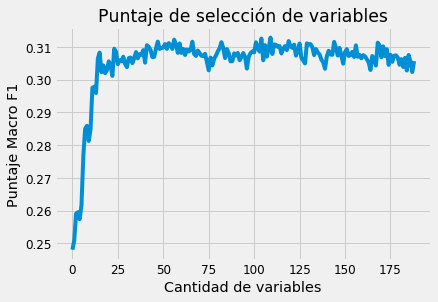

In [54]:
plt.plot(selector.grid_scores_);

plt.xlabel('Cantidad de variables'); plt.ylabel('Puntaje Macro F1'); plt.title('Puntaje de selección de variables');
selector.n_features_

In [55]:
rankings = pd.DataFrame({'variable': list(train_set.columns), 'posición': list(selector.ranking_)}).sort_values('posición')
rankings.head(10)

,variable,posición
0,sexo,1
117,cesd_p1d_2017,1
118,cesd_p1e_2017,1
119,cesd_p1f_2017,1
120,cesd_p1g_2017,1
121,cesd_p1h_2017,1
122,cesd_p1i_2017,1
123,cesd_p1j_2017,1
125,psi_p1_2017,1
126,psi_p2_2017,1


In [56]:
train_selected = selector.transform(train_set)
test_selected = selector.transform(test_set)

In [57]:
# Convertimos de vuelta a dataframe
selected_features = train_set.columns[np.where(selector.ranking_==1)]
train_selected = pd.DataFrame(train_selected, columns = selected_features)
test_selected = pd.DataFrame(test_selected, columns = selected_features)

In [58]:
model_results = cv_model(train_selected, train_labels, model, 'RF-SEL', model_results)

10 Fold CV Score: 0.31058 with std: 0.00971


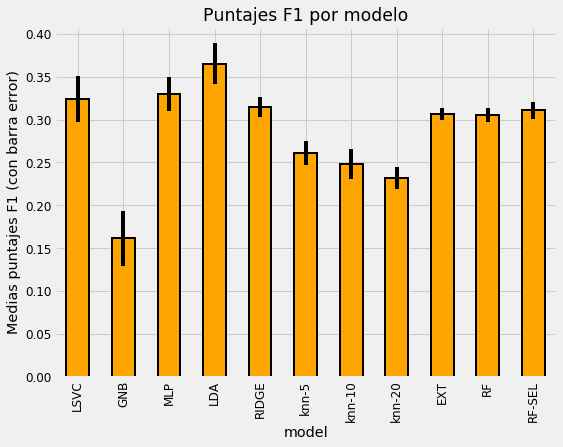

In [59]:
model_results.set_index('model', inplace = True)
model_results['cv_mean'].plot.bar(color = 'orange', figsize = (8, 6),
                                  yerr = list(model_results['cv_std']),
                                 edgecolor = 'k', linewidth = 2)
plt.title('Puntajes F1 por modelo');
plt.ylabel('Medias puntajes F1 (con barra error)');
model_results.reset_index(inplace = True)